## Visualization using MatPlotLib & Seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# important: ensures the visualizations will be in the Notebook
%matplotlib inline 

In [18]:
import pandas as pd
df = pd.read_csv('GlobalSuperstore.csv')
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,Market,Region,Product ID,Category,Sub-Category,Sales,Quantity,Profit,Shipping Cost,Order Priority
0,CA2012124891,7/31/2012,Same Day,RH-19495,Consumer,United States,US,East,TECAC10003033,Technology,Accessories,2309.650,7,762.1845,933.57,Critical
1,IN201377878,2/5/2013,Second Class,JR-16210,Corporate,Australia,APAC,Oceania,FURCH10003950,Furniture,Chairs,3709.395,9,-288.7650,923.63,Critical
2,IN201371249,10/17/2013,First Class,CR-12730,Consumer,Australia,APAC,Oceania,TECPH10004664,Technology,Phones,5175.171,9,919.9710,915.49,Medium
3,ES20131579342,1/28/2013,First Class,KM-16375,Home Office,Germany,EU,Central,TECPH10004583,Technology,Phones,2892.510,5,-96.5400,910.16,Medium
4,SG20134320,11/5/2013,Same Day,RH-9495,Consumer,Senegal,Africa,Africa,TECSHA10000501,Technology,Copiers,2832.960,8,311.5200,903.04,Critical


In [19]:
df1=df.copy()

In [20]:
df1.shape

(51290, 16)

In [21]:
df1.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Segment',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [22]:
df1.isnull().sum()

Order ID          0
Order Date        0
Ship Mode         0
Customer ID       0
Segment           0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [23]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


## Correlations

In [24]:
corr=df1.corr()
corr.style.background_gradient() # add shading

,Sales,Quantity,Profit,Shipping Cost
Sales,1.000000,0.313577,0.484918,0.768073
Quantity,0.313577,1.000000,0.104365,0.272649
Profit,0.484918,0.104365,1.000000,0.354441
Shipping Cost,0.768073,0.272649,0.354441,1.000000


## Bar chart

***Create Bar chart to show Average sales in each Region (use matplotlib)***
* sort it in descending order

<AxesSubplot:title={'center':'Region vs. Average Sales'}, xlabel='Region', ylabel='Average Sales'>

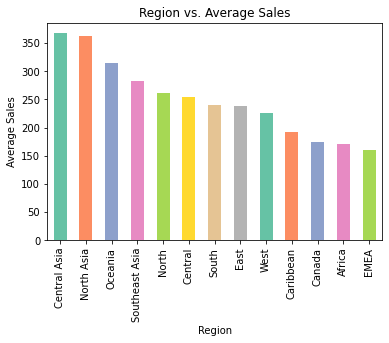

In [25]:
plt.title('Region vs. Average Sales')
plt.xlabel('Region')
plt.ylabel('Average Sales')


ax=df1['Sales'].groupby(df1['Region']).mean().sort_values(ascending=False)


ax.plot(kind='bar', color=sns.color_palette("Set2")) # I used seaborn color palette



***Create Bar chart to show Average Profit in each Category (use matplotlib)***
* sort it in descending order

<AxesSubplot:title={'center':'Category vs. Average Profit'}, xlabel='Category', ylabel='Average Profit'>

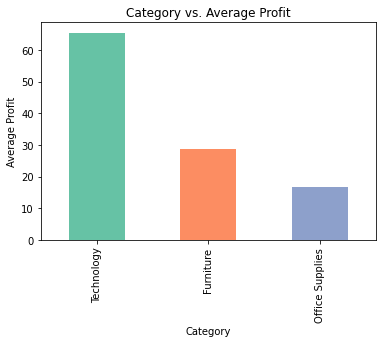

In [26]:
plt.title('Category vs. Average Profit')
plt.xlabel('Category')
plt.ylabel('Average Profit')


ax=df1['Profit'].groupby(df1['Category']).mean().sort_values(ascending=False)


ax.plot(kind='bar', color=sns.color_palette("Set2")) # I used seaborn color palette


**Create Bar chart to show Average Profit in each Category in 'Australia' and 'United States'**
* sort it in descending order

<AxesSubplot:title={'center':'Category vs. Average Profit'}, xlabel='Category', ylabel='Average Profit'>

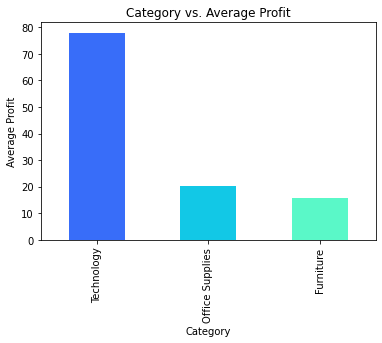

In [27]:
plt.title('Category vs. Average Profit')
plt.xlabel('Category')
plt.ylabel('Average Profit')

df2=df1.loc[(df1['Country']=='Australia')|(df1['Country']=='United States')].copy()
ax=df2['Profit'].groupby(df2['Category']).mean().sort_values(ascending=False)

ax.plot(kind='bar', color=sns.color_palette("rainbow"))


**Create side by side bar chart to show Average Sale and Average Profit  in each Category in 'United States' and in 'Australia'**
* sort it in descending order

Text(0.5, 1.0, 'Category vs. Average Sale & Average Profit')

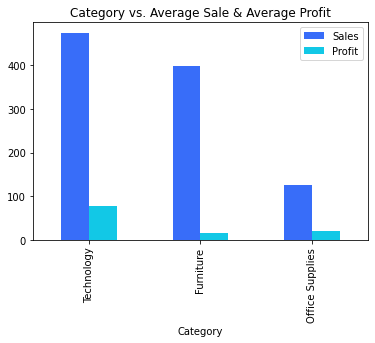

In [28]:
df2=df1.loc[(df1['Country']=='Australia')|(df1['Country']=='United States')].copy()
ax=df2[['Sales','Profit']].groupby(df2['Category']).mean().sort_values(by='Sales',ascending=False)

ax.plot(kind='bar', color=sns.color_palette("rainbow"))


plt.title('Category vs. Average Sale & Average Profit')

**Create a countplot to show the number of orders in each Category in 'Australia' and to show the number of orders in each Category in 'United States'**

* Change the color by Country
* sort it in descending order

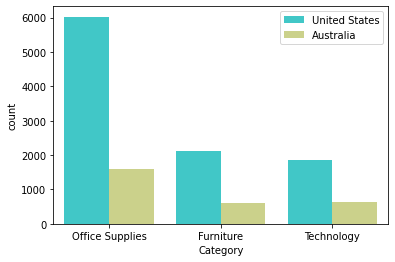

In [29]:
df2=df1.loc[(df1['Country']=='Australia')|(df1['Country']=='United States')].copy()
sns.countplot(x=df2['Category'], hue=df2['Country'], palette="rainbow", order = df2['Category'].value_counts().index)
plt.legend(loc='upper right')

**Create a Line chart to show the number of orders in each month in 2014** (use month text)

<AxesSubplot:>

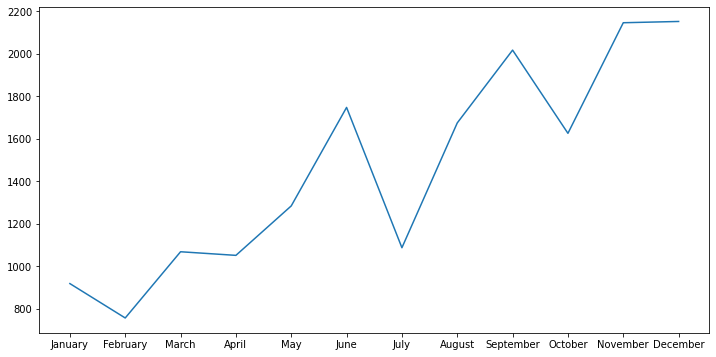

In [30]:
plt.figure(figsize=(12, 6))

df1['Order Date_parsed'] = pd.to_datetime(df1['Order Date'])
df1['Order Month']=df1['Order Date_parsed'].dt.month_name()
df1['Order Year']=df1['Order Date_parsed'].dt.year

df2=df1.loc[df1['Order Year']==2014].copy()

plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax=df2['Order Month'].value_counts()

ax = ax.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))


ax.plot(kind="line")

In [31]:
df2['Order Month'].value_counts()

December     2153
November     2147
September    2018
June         1748
August       1675
October      1626
May          1284
July         1087
March        1068
April        1051
January       918
February      756
Name: Order Month, dtype: int64

**Create Line chart to show sum of profits for each year**
* Change the color with Category


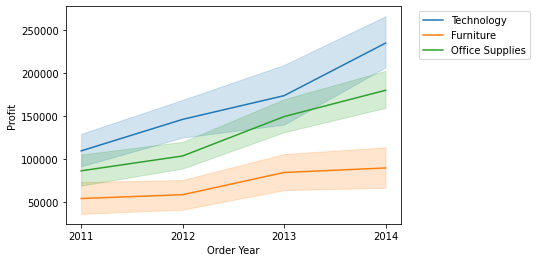

In [32]:
df1['Order Date_parsed'] = pd.to_datetime(df1['Order Date'])
df1['Order Year']=df1['Order Date_parsed'].dt.year

sns.lineplot(x=df1['Order Year'], y=df1['Profit'], hue=df1['Category'], estimator='sum')

plt.legend(loc='upper right', bbox_to_anchor=(1.4,1))

plt.locator_params(axis='x', nbins=4)



**Create a Line chart to show average Sales and average profits across the years**

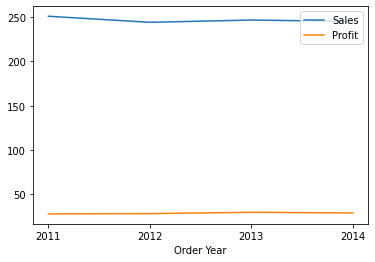

In [33]:
df1['Sales'].groupby(df1['Order Year']).mean().plot(kind='line')
df1['Profit'].groupby(df1['Order Year']).mean().plot(kind='line')
plt.legend(loc='upper right')
plt.locator_params(axis='x', nbins=4)
plt.show()

**Create a stacked bar plot of average Sales and average Profit for different years**

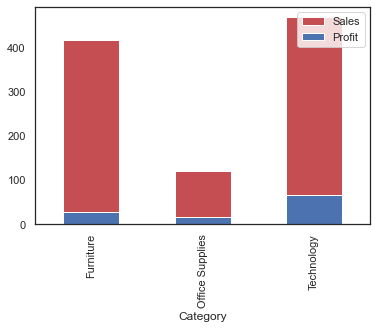

In [151]:
df1['Sales'].groupby(df1['Category']).mean().plot(kind='bar', color='r')
df1['Profit'].groupby(df1['Category']).mean().plot(kind='bar', color='b')

plt.legend(loc='upper right')

plt.show()

**Create a scatterplot of Sales and Profit in 2014. Change the color by Category (use seaborn)** (Filter the results for 2014)

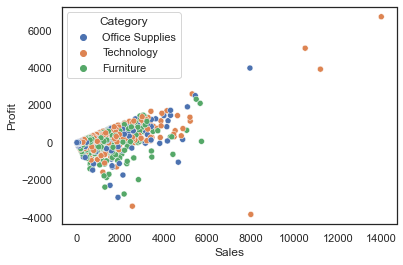

In [150]:
df1['Order Date_parsed'] = pd.to_datetime(df1['Order Date'])
df1['Order Year']=df1['Order Date_parsed'].dt.year
df2=df1.loc[df1['Order Year']==2014].copy()

sns.scatterplot(x=df2['Sales'], y=df2['Profit'], hue=df2['Category'])

sns.set_style("white")

**Create a scatterplot of Sales and Profit only for Furniture category (use seaborn)**

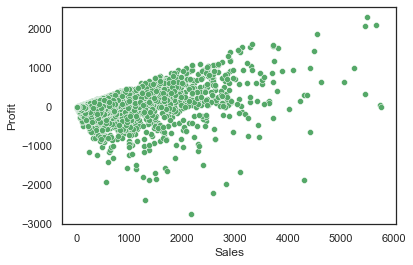

In [89]:
df2=df1.loc[(df1['Category']=='Furniture')].copy()

sns.scatterplot(x=df2['Sales'], y=df2['Profit'], color='g')
sns.set_style("white")

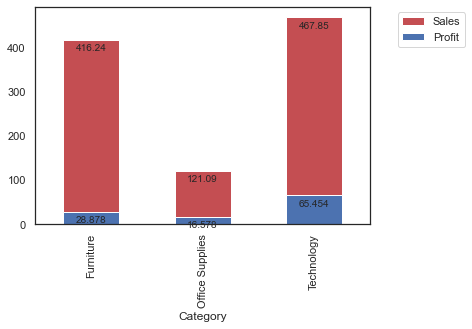

In [105]:
ax=df1['Sales'].groupby(df1['Category']).mean()
ax.plot(kind='bar', color='r')
for index in range(len(ax)):
    plt.text(index, ax[index]-25, str(ax[index])[:6], ha='center')

ax2=df1['Profit'].groupby(df1['Category']).mean()
ax2.plot(kind='bar', color='b')
for index in range(len(ax2)):
    plt.text(index, ax2[index]-25, str(ax2[index])[:6], ha='center')
    
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))

plt.show()

In [101]:
df1['Profit'].groupby(df1['Category']).mean()

Category
Furniture          28.878567
Office Supplies    16.578961
Technology         65.454958
Name: Profit, dtype: float64

### Subplot

Subplotting is a technique for creating multiple plots that are side-by-side in one figure. We can use the subplots method to create a figure with multiple subplots. subplots takes two arguments. The first one controls the number of rows, the second one the number of columns.

subplot returns a figure (which we assigned to fig) and an array of the axes (which we assigned to axarr).

C:\Users\hanieh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0, 0.5, 'Average Profit')

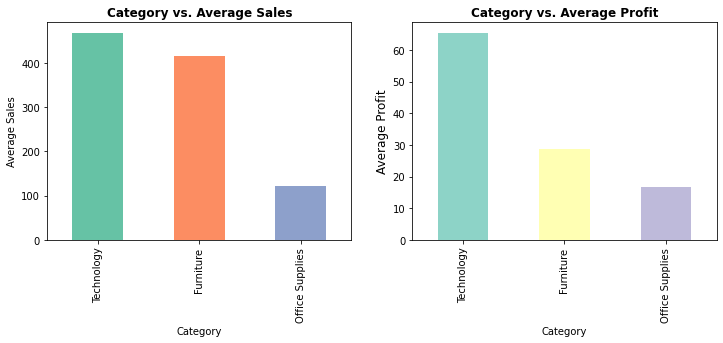

In [197]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))


ax=df1['Sales'].groupby(df1['Category']).mean().sort_values(ascending=False)
ax.plot(kind='bar', color=sns.color_palette("Set2"), ax=axarr[0])
axarr[0].set_title("Category vs. Average Sales", fontsize=12, fontweight='bold')
axarr[0].set_ylabel("Average Sales", fontsize=10)
    

ax=df1['Profit'].groupby(df1['Category']).mean().sort_values(ascending=False)
ax.plot(kind='bar', color=sns.color_palette("Set3"), ax=axarr[1])
axarr[1].set_title("Category vs. Average Profit", fontsize=12, fontweight='bold')
axarr[1].set_ylabel("Average Profit", fontsize=12)



Text(0, 0.5, 'Sum Profit')

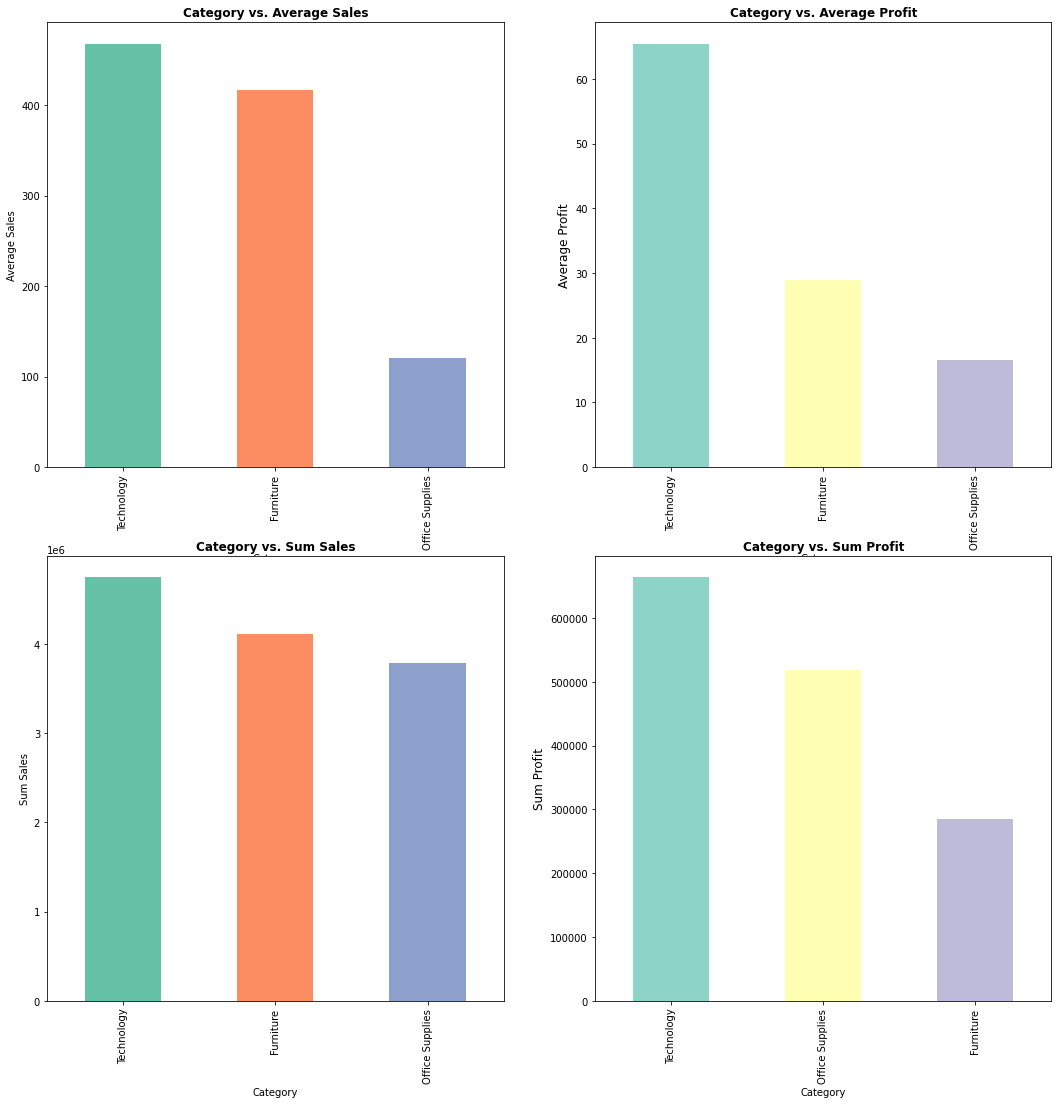

In [181]:
fig, axarr = plt.subplots(2, 2, figsize=(18, 18))




ax=df1['Sales'].groupby(df1['Category']).mean().sort_values(ascending=False)
ax.plot(kind='bar', color=sns.color_palette("Set2"), ax=axarr[0][0])
axarr[0][0].set_title("Category vs. Average Sales", fontsize=12, fontweight='bold')
axarr[0][0].set_ylabel("Average Sales", fontsize=10)

ax=df1['Profit'].groupby(df1['Category']).mean().sort_values(ascending=False)
ax.plot(kind='bar', color=sns.color_palette("Set3"), ax=axarr[0][1])
axarr[0][1].set_title("Category vs. Average Profit", fontsize=12, fontweight='bold')
axarr[0][1].set_ylabel("Average Profit", fontsize=12)

ax=df1['Sales'].groupby(df1['Category']).sum().sort_values(ascending=False)
ax.plot(kind='bar', color=sns.color_palette("Set2"), ax=axarr[1][0])
axarr[1][0].set_title("Category vs. Sum Sales", fontsize=12, fontweight='bold')
axarr[1][0].set_ylabel("Sum Sales", fontsize=10)

ax=df1['Profit'].groupby(df1['Category']).sum().sort_values(ascending=False)
ax.plot(kind='bar', color=sns.color_palette("Set3"), ax=axarr[1][1])
axarr[1][1].set_title("Category vs. Sum Profit", fontsize=12, fontweight='bold')
axarr[1][1].set_ylabel("Sum Profit", fontsize=12)


**Create subplots to show histogram of Sales and histogram of profit**

Text(0, 0.5, 'Frequency')

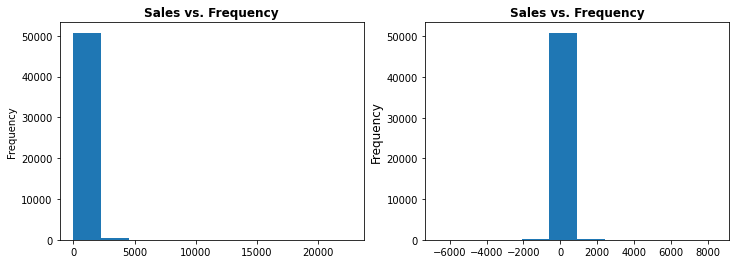

In [164]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

axarr[0].hist(df1['Sales'])
axarr[0].set_title("Sales vs. Frequency", fontsize=12, fontweight='bold')
axarr[0].set_ylabel("Frequency", fontsize=10)

axarr[1].hist(df1['Profit'])
axarr[1].set_title("Sales vs. Frequency", fontsize=12, fontweight='bold')
axarr[1].set_ylabel("Frequency", fontsize=12)


In [ ]:
sns.set(rc={'figure.figsize':(8,7)})
sns.set_style("whitegrid")

dfg = df.groupby(['month', 'source_id']).agg({'revenue': sum}).reset_index()

In [ ]:
df2=df1.loc[(df1['Country']=='Australia')|(df1['Country']=='United States')].copy()
ax= df2.groupby(['Category', 'Country']).agg({'Profit': sum}).reset_index()

ax.plot(kind='bar', color=sns.color_palette("rainbow"))
